<a href="https://colab.research.google.com/github/AmithReddyKasarla/AmithReddy_INFO5502_-Spring2022/blob/main/lab_assignment_04_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (02/17/2022, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentence (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

Cloning into 'cases'...
remote: Enumerating objects: 29482, done.
remote: Counting objects: 100% (29482/29482), done.
remote: Compressing objects: 100% (29481/29481), done.
remote: Total 29482 (delta 0), reused 29482 (delta 0), pack-reused 0
Receiving objects: 100% (29482/29482), 217.55 MiB | 10.71 MiB/s, done.
Checking out files: 100% (29404/29404), done.


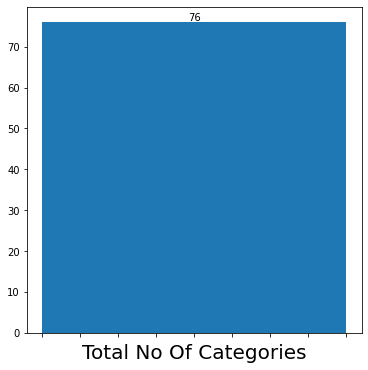



Total Number of Documnets: 29404


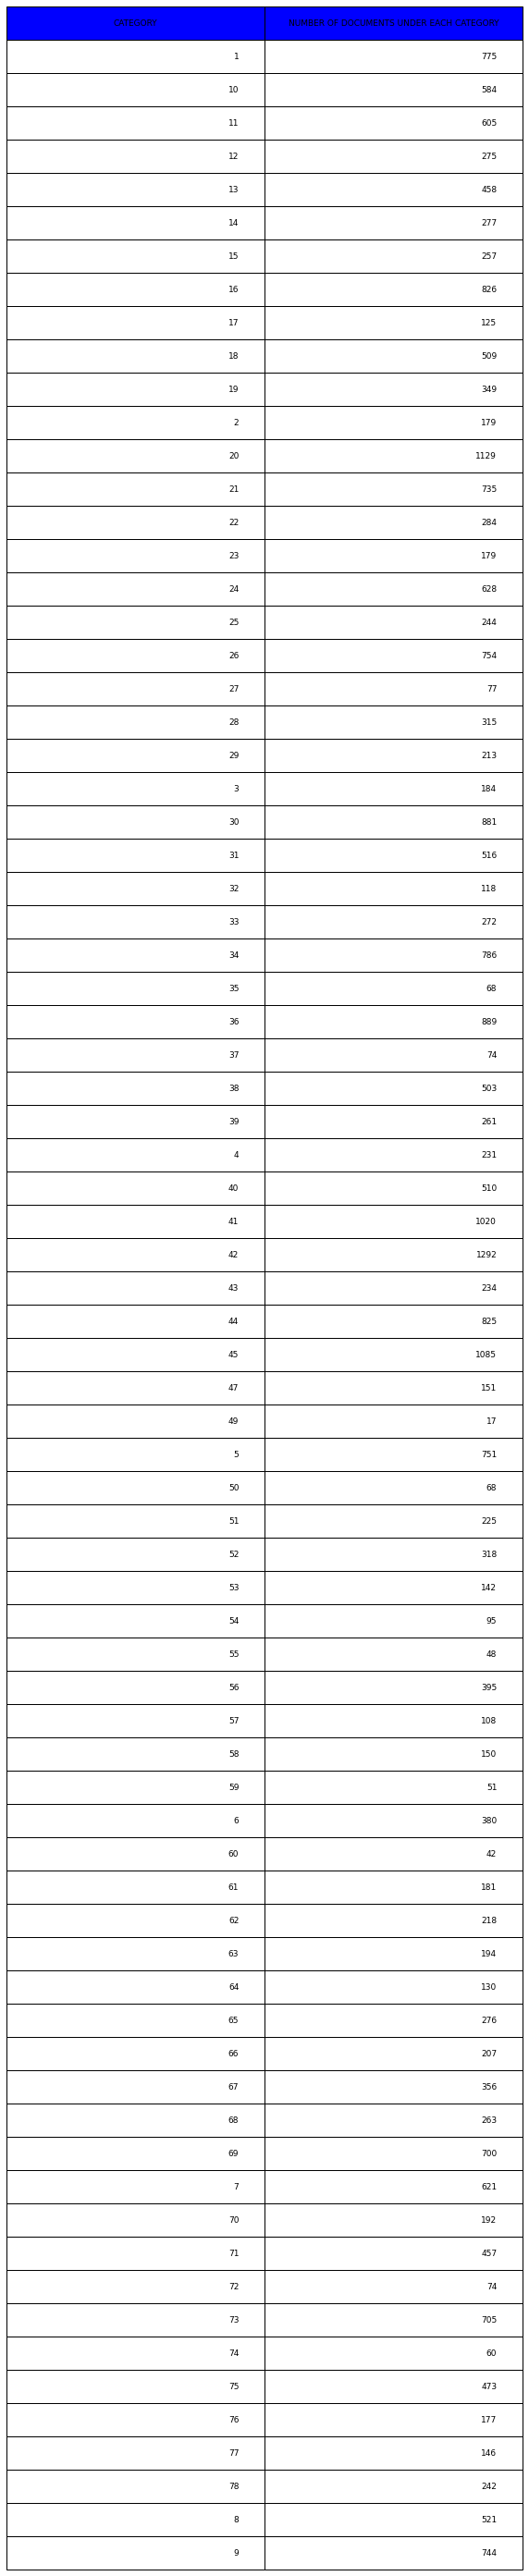

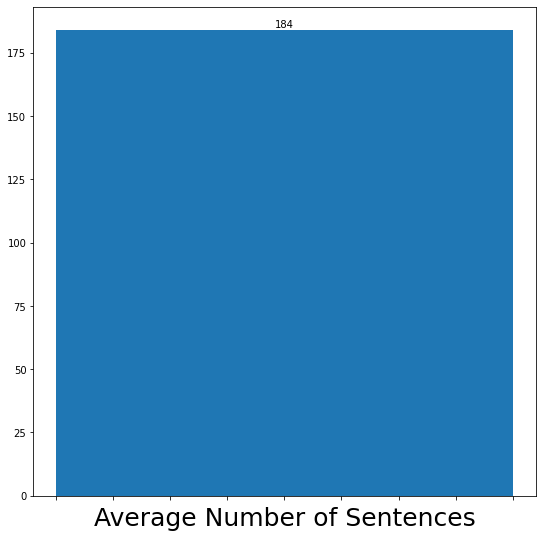

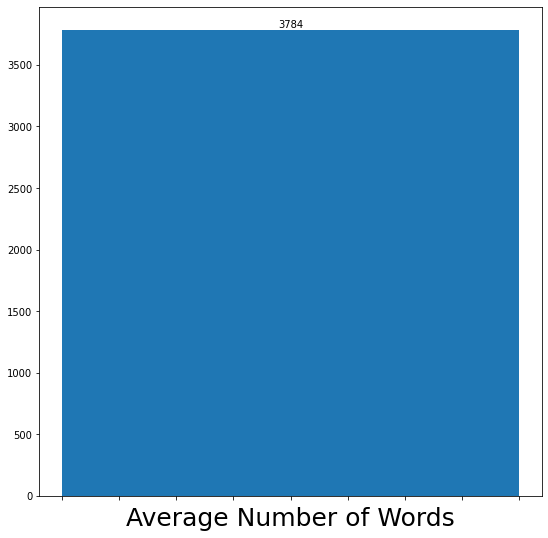

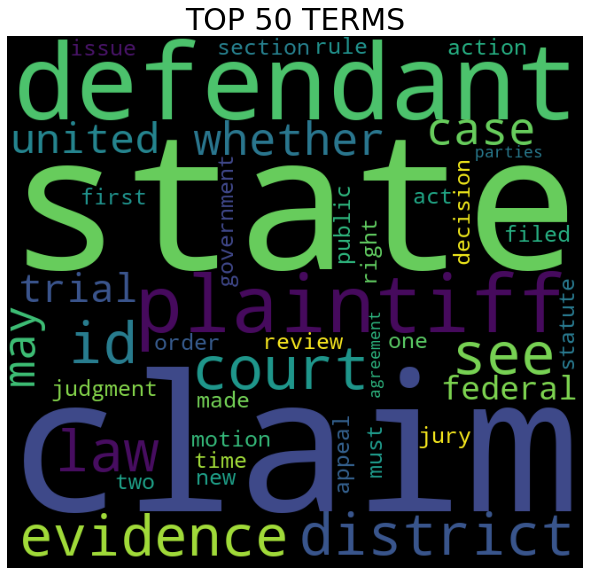

In [1]:
# Your answer here (code + explanation):
#Here i am downloading the data from my Github repository
!git clone https://github.com/gantaphani/cases.git

#Importing all the required libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from importlib import reload

#Declaring categories to 0
categories=0

#Counting the categories in the respective directory  
for category in os.listdir('/content/cases'):
  if not category.startswith('.git'):
    categories+=1

#Plotting the categories 
plt.figure(figsize=(6,6))
plt.bar(20,categories)
plt.xlabel('Total No Of Categories',fontsize=20)

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    new_width = width * 1
    patch.set_width(new_width)
    x = patch.get_x()
    patch.set_x(x + (width - new_width) / 2)
    ax.text(x=x + width/2, y=height, s=height, ha='center', va='bottom')

plt.show()

#(2)
#We will be finding the no.of documnets under each category

C=[]
totalCount=0

def categoryDocumentCount(folder):
    global totalCount
    count = 0

    for sub in os.listdir(folder):
        path = os.path.join(folder, sub)
        if os.path.isfile(path):
            if sub.startswith('case'):
              count += 1
        else:
          categoryDocumentCount(path)

    if folder not in C and not folder.__contains__('.git'):
      if folder.find('s/')>=0:
        C.append([folder[folder.index('s/')+2:],count])
        totalCount+=count

categoryDocumentCount('/content/cases')
result=pd.DataFrame(C,columns=['CATEGORY','NUMBER OF DOCUMENTS UNDER EACH CATEGORY'])
result.sort_values(['CATEGORY'],inplace=True)
print('\n')
print('Total Number of Documnets: '+str(totalCount))
fig, ax =plt.subplots(1,1)
fig.set_size_inches(10, 10, forward=True)
ax.axis('off')
tab=ax.table(cellText=result.values,colLabels=result.columns,loc="center",colColours =["blue"] * 2)
tab.scale(1, 3)
plt.show()

#(3&4)
#Here I am finding average no.of sentence and average no.of words in the document

totalSentenceCount=0
totalFileCount=0
totalWordCount=0
words=dict()
topWords=''

(pd.read_csv('https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK\'s%2520list%2520of%2520english%2520stopwords',sep='\n',header=None)).to_csv('stopwords.txt',sep=',',header=False,index=False)
stopwords=open('/content/stopwords.txt','r').read().strip('\n').split('\n')
def sentenceWordsCount(folder):
    global totalSentenceCount
    global totalFileCount
    global totalWordCount

    for sub in os.listdir(folder):
        path = os.path.join(folder, sub)
        if os.path.isfile(path):
          if sub.startswith('case'):
            data=open(path, 'r').read()
            totalSentenceCount+=len(data.strip('\n').split('.'))
            for sent in data.strip('\n').split('.'):
              for word in sent.split():
                if word in words and word not in stopwords:
                  words[word]+=1
                else:
                  if word not in stopwords:
                    words[word]=1
              totalWordCount+=len(sent.split())
            totalFileCount+=1
        else:
          sentenceWordsCount(path)

sentenceWordsCount('/content/cases')
#Finding no.of sentence 
plt.figure(figsize=(9,9))
plt.bar(20,round(totalSentenceCount/totalFileCount))
plt.xlabel('Average Number of Sentences',fontsize=25)

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    new_width = width * 1
    patch.set_width(new_width)
    x = patch.get_x()
    patch.set_x(x + (width - new_width) / 2)
    ax.text(x=x + width/2, y=height, s=height, ha='center', va='bottom')

plt.show()
#Finding average no.of words
plt.figure(figsize=(9,9))
plt.bar(20,round(totalWordCount/totalFileCount))
plt.xlabel('Average Number of Words',fontsize=25)

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    new_width = width * 1
    patch.set_width(new_width)
    x = patch.get_x()
    patch.set_x(x + (width - new_width) / 2)
    ax.text(x=x + width/2, y=height, s=height, ha='center', va='bottom')

plt.show()

#(5)
#Now I am counting the words and taking top 50 out of all 
plt=reload(plt)

topWords += " ".join(dict(Counter(words).most_common(50)).keys())+" "
wordcloud = WordCloud(width = 650, height = 600,
                background_color ='black',
                min_font_size = 10).generate(topWords)
 
# plot the top 30 terms with help ofWordCloud image                 
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("TOP 50 TERMS",fontsize=30)
plt.tight_layout(pad = 0)
 
plt.show()

Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

![heatmap.png](attachment:heatmap.png)

COLUMNS IN OUR DATASET
Index(['ge', 'cst', 'tnp', 'twp', 'iap', 'esp', 'arr', 'ms', 'ls', 'as', 'fmi',
       'fs', 'fq', 'mq', 'fo', 'mo', 'nf', 'sh', 'ss', 'me', 'tt', 'atd'],
      dtype='object')


Description of all the columns
ge Stands for Student's Gender
cst Stands for Student's Caste
tnp Stands for Class X Percentage
twp Stands for Class XII Percentage
iap Stands for Internal Assessment Percentage
esp Stands for End Semester Percentage
arr Stands for whether the student has back or arrear papers
ms Stands for Martial Status
ls Stands for Lived in Town or Village
as Stands for Admission Category
fmi Stands for Family Monthly Income
fs Stands for Family Size
fq Stands for Father's Qualification
mq Stands for Mother's Qualification
fo Stands for Father's Occupation
mo Stands for Mother's Occupation
nf Stands for No of Friends
sh Stands for Study Hours
ss Stands for School attended by Student at X standard
me Stands for Medium
tt Stands for Travel Time from Home to College
atd St

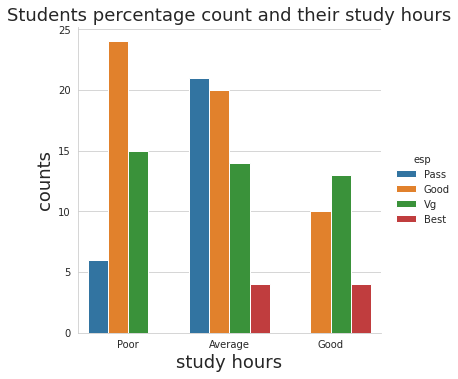

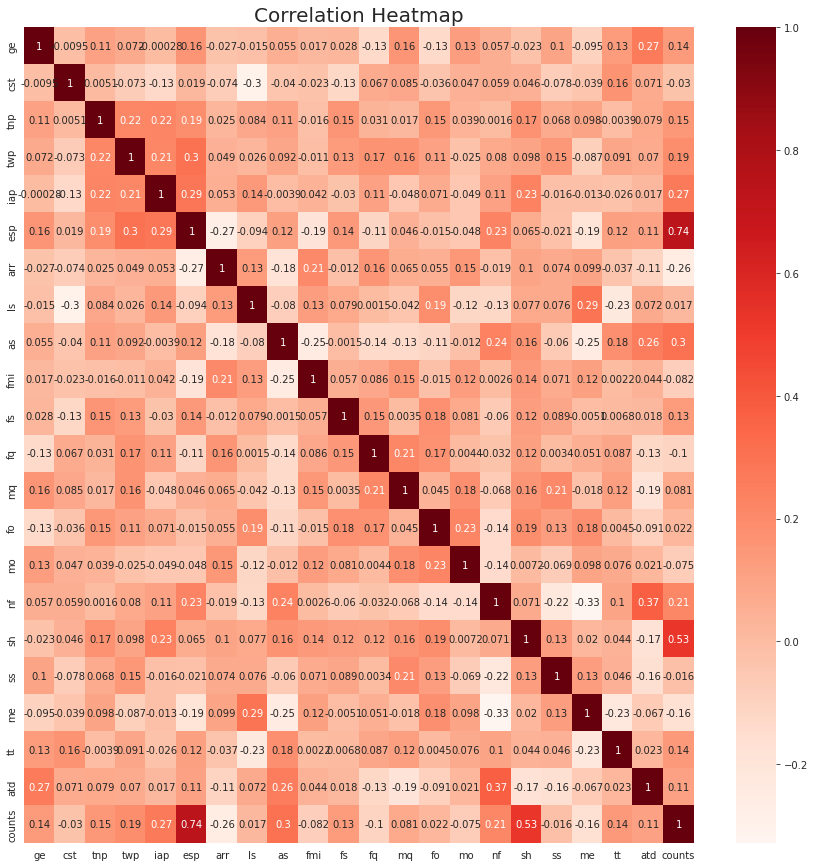

In [80]:
# Your answer here (code + explanation):

#Importing all the libraries  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Reading the data from the git hub raw link  
studentPerformance=pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab-assignment-04-student-performance.csv',sep=',')
#Printing all the required information
print('COLUMNS IN OUR DATASET')
print(studentPerformance.columns)
print('\n')
print('Description of all the columns')
print('ge stands for Student\'s Gender')
print('cst stands for Student\'s Caste')
print('tnp stands for Class X Percentage')
print('twp stands for Class XII Percentage')
print('iap stands for Internal Assessment Percentage')
print('esp stands for End Semester Percentage')
print('arr stands for whether the student has back or arrear papers')
print('ms stands for Martial Status')
print('ls stands for Lived in Town or Village')
print('as stands for Admission Category')
print('fmi stands for Family Monthly Income')
print('fs stands for Family Size')
print('fq stands for Father\'s Qualification')
print('mq stands for Mother\'s Qualification')
print('fo stands for Father\'s Occupation')
print('mo stands for Mother\'s Occupation')
print('nf stands for No of Friends')
print('sh stands for Study Hours')
print('ss stands for School attended by Student at X standard')
print('me stands for Medium')
print('tt stands for Travel Time from Home to College')
print('atd stands for Attendance Percentage')
print('\n')
print("Number of Rows for each column")
#using for loop for counting the rows
for name in studentPerformance.columns:
  print(name,' ',len(studentPerformance[name]))
print('\n')
print("Number of unique elements in a column")
#Finding the unique elements
print(studentPerformance.nunique())
print('\n')
print("Frequency of each unique element in a column")
#Finding the frequency of the unique elements
for name in studentPerformance.columns:
  print(name,' ',dict(studentPerformance[name].value_counts()))
print('\n')
from importlib import reload
plt=reload(plt)

s.set_style('whitegrid')
studentPerformance['counts']=studentPerformance.groupby(['sh','esp'])['esp'].transform('count')
ax=s.factorplot(x='sh',y='counts',hue='esp',data=studentPerformance,hue_order=['Pass','Good','Vg','Best'],kind='bar')
plt.title('Students percentage count and their study hours',fontsize=18)
plt.xlabel('study hours',fontsize=18)
plt.ylabel('counts',fontsize=18)
plt.show()

#Building the Heatmap
from importlib import reload
plt=reload(plt)

correlationDataset=studentPerformance.copy()

for columnname,values in correlationDataset.iteritems():
  if len(correlationDataset[columnname].unique())==1:
    to_drop=columnname

correlationDataset.drop(to_drop,inplace=True,axis=1)
correlation = correlationDataset.apply(lambda x: x.factorize()[0]).corr()
plt.figure(figsize=(15,15))
s.heatmap(correlation, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)
plt.show()






Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

In [ ]:
# Your three questions:

'''
Please list your questions here:
I am taking Blackfriday Dataset from kaggle.
Here for this data set i am performing all the Exploratory Data Analysis and feature selection.
1) Checking if all the features are of same type and checking all the missing values.
2) How to perfrom encoding to a feature.
3) Visulaizing Age vs Purchase with respect to Gender.
4) Visulaizing Occupation vs Purchase with respect to Gender.
5) Splitting and Scaling the Data 



'''

'\nPlease list your questions here:\n\n\n\n\n\n'

In [35]:
# You code to answer the three questions (Please add comments in the code):
import numpy as np
import pandas as pd
#importing the date set
dtrain = pd.read_csv('/content/sample_data/Blackfriday_train.csv')
dtrain







,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [36]:
dtest = pd.read_csv("/content/sample_data/Blackfriday_test.csv")
dtest

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [37]:
data = dtrain.append(dtest)
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [39]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [40]:
data.drop(['User_ID'],axis = 1,inplace= True)
data

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [41]:
#Handling caterogical feature Gender
#Converting gender into numerical value
data['Gender']=data['Gender'].map({'F':0,'M':1})
data

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [42]:
#converting Age
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [43]:
#Using LabelEncoder for coding the age 
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['Age'] = label_encoder.fit_transform(data['Age'])

data['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [44]:
data

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,2,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,2,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,2,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,4,1,C,4+,0,10,16.0,NaN,NaN


In [45]:
#converting categorical city
df_city=pd.get_dummies(data['City_Category'],drop_first=True)

In [46]:
data = pd.concat([data,df_city],axis=1)

In [47]:
#Droping the city_category
data.drop('City_Category',axis = 1,inplace = True)
data

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,2,15,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,2,15,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,2,15,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,4,1,4+,0,10,16.0,NaN,NaN,0,1


In [48]:
#Missing Values
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [49]:
#Replacing missing values
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [50]:
data['Product_Category_2'].mode()[0]

8.0

In [51]:
#we use mode to replace nan becaue this is having discreate values. And should not use mean because it will create a new categorical value
data['Product_Category_2'] = data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0])

In [52]:
data['Product_Category_2'].isnull().sum()

0

In [53]:
data['Product_Category_3'].mode()[0]

16.0

In [54]:
data['Product_Category_3'] = data['Product_Category_3'].fillna(data['Product_Category_2'].mode()[0])

In [55]:
data['Product_Category_3'].isnull().sum()

0

In [56]:
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,8.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,8.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,8.0,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,8.0,8.0,7969.0,0,1


In [57]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [59]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].str.replace('+','')
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,8.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,8.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,8.0,1057.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,8.0,7969.0,0,1


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [61]:
#Changing the datatype
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 67.3+ MB


In [63]:
data['B']=data['B'].astype(int)
data['C']=data['C'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


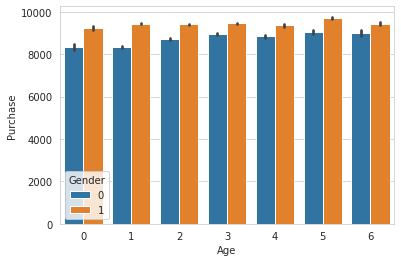

In [64]:
##Visualization
sns.barplot('Age','Purchase', hue='Gender', data= data)

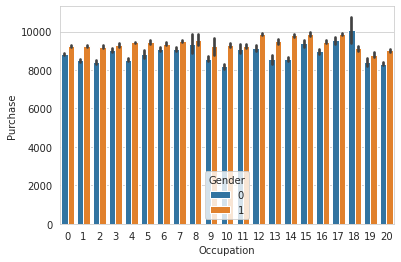

In [65]:
#Visualization of purchase with occupation
sns.barplot('Occupation','Purchase',hue = 'Gender', data = data)

In [66]:
#Splitting
df_test = data[data['Purchase'].isnull()]

In [67]:
df_train = data[~data['Purchase'].isnull()]

In [68]:
X = df_train.drop('Purchase',axis = 1)
X

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,0,10,2,0,3,8.0,8.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,8.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,8.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,8.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,5,13,1,1,20,8.0,8.0,1,0
550064,P00375436,0,2,1,3,0,20,8.0,8.0,0,1
550065,P00375436,0,2,15,4,1,20,8.0,8.0,1,0
550066,P00375436,0,6,1,2,0,20,8.0,8.0,0,1


In [69]:
X.shape

(550068, 11)

In [70]:
Y = df_train['Purchase']
Y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, train_size = 0.7, random_state = 42)

In [74]:
x_train.drop('Product_ID',axis = 1, inplace = True)
x_test.drop('Product_ID',axis = 1, inplace = True)

In [75]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_train)
x_test = sc.transform(x_test)